In [218]:
import numpy as  np  # linear algebra# linea 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

In [219]:
df = pd.read_csv('data.csv')
test = pd.read_csv('test_data.csv')
train = pd.read_csv('training_data.csv')

In [213]:
train.head()

shot_id   game_date        action_type  loc_x  loc_y  \
0        2  10/31/2000          Jump Shot   -157      0   
1        4  10/31/2000          Jump Shot    138    175   
2        6  10/31/2000          Jump Shot   -145    -11   
3       10  10/31/2000  Running Jump Shot    -33    125   
4       11  10/31/2000          Jump Shot    -94    238   

   total_seconds_remaining  period  playoffs   season  shot_distance  \
0                      622       1         0  2000-01             15   
1                      412       1         0  2000-01             22   
2                      572       3         0  2000-01             14   
3                      216       3         0  2000-01             12   
4                      116       3         0  2000-01             25   

   shot_made_flag       shot_type         shot_zone_area  \
0               0  2PT Field Goal           Left Side(L)   
1               0  2PT Field Goal  Right Side Center(RC)   
2               0  2PT Field Goal           Left Side(L)   
3               0  2PT Field Goal              Center(C)   
4               0  3PT Field Goal   Left Side Center(LC)   

         shot_zone_basic shot_zone_range opponent Home_vs_Away      lat  \
0              Mid-Range        8-16 ft.      POR         Away  34.0443   
1              Mid-Range       16-24 ft.      POR         Away  33.8693   
2              Mid-Range        8-16 ft.      POR         Away  34.0553   
3  In The Paint (Non-RA)        8-16 ft.      POR         Away  33.9193   
4      Above the Break 3         24+ ft.      POR         Away  33.8063   

        lon  
0 -118.4268  
1 -118.1318  
2 -118.4148  
3 -118.3028  
4 -118.3638

In [ ]:
plt.scatter(train['shot_distance'], )
plt.show()

In [134]:
train.describe()

shot_id         loc_x         loc_y  total_seconds_remaining  \
count  25697.000000  25697.000000  25697.000000             25697.000000   
mean   15328.166946      7.148422     91.257345               321.519321   
std     8860.462397    110.073147     88.152106               208.311076   
min        2.000000   -250.000000    -44.000000                 0.000000   
25%     7646.000000    -67.000000      4.000000               141.000000   
50%    15336.000000      0.000000     74.000000               304.000000   
75%    22976.000000     94.000000    160.000000               499.000000   
max    30697.000000    248.000000    791.000000               714.000000   

             period      playoffs  shot_distance  shot_made_flag  \
count  25697.000000  25697.000000   25697.000000    25697.000000   
mean       2.520800      0.146243      13.457096        0.446161   
std        1.151626      0.353356       9.388725        0.497103   
min        1.000000      0.000000       0.000000        0.000000   
25%        1.000000      0.000000       5.000000        0.000000   
50%        3.000000      0.000000      15.000000        0.000000   
75%        3.000000      0.000000      21.000000        1.000000   
max        7.000000      1.000000      79.000000        1.000000   

                lat           lon  
count  25697.000000  25697.000000  
mean      33.953043   -118.262652  
std        0.088152      0.110073  
min       33.253300   -118.519800  
25%       33.884300   -118.336800  
50%       33.970300   -118.269800  
75%       34.040300   -118.175800  
max       34.088300   -118.021800

In [135]:
train.dtypes

shot_id                      int64
game_date                   object
action_type                 object
loc_x                        int64
loc_y                        int64
total_seconds_remaining      int64
period                       int64
playoffs                     int64
season                      object
shot_distance                int64
shot_made_flag               int64
shot_type                   object
shot_zone_area              object
shot_zone_basic             object
shot_zone_range             object
opponent                    object
Home_vs_Away                object
lat                        float64
lon                        float64
dtype: object

In [214]:
train_numbers = train.drop(['total_seconds_remaining', 'shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent', 'Home_vs_Away'], axis=1)

In [215]:
action_columns = pd.get_dummies(train_numbers['action_type'],prefix = "action")
train_numbers = pd.concat([train_numbers, action_columns], axis=1)

In [216]:
action_columns = pd.get_dummies(train_numbers['season'],prefix = "action")
train_numbers = pd.concat([train_numbers, action_columns], axis=1)

In [217]:
train_numbers.drop('action_type', axis=1, inplace=True)
train_numbers.drop('season', axis=1, inplace=True)
train_numbers.head()

loc_x  loc_y  period  playoffs  shot_distance  shot_made_flag      lat  \
0   -157      0       1         0             15               0  34.0443   
1    138    175       1         0             22               0  33.8693   
2   -145    -11       3         0             14               0  34.0553   
3    -33    125       3         0             12               0  33.9193   
4    -94    238       3         0             25               0  33.8063   

        lon  action_Alley Oop Dunk Shot  action_Alley Oop Layup shot  \
0 -118.4268                           0                            0   
1 -118.1318                           0                            0   
2 -118.4148                           0                            0   
3 -118.3028                           0                            0   
4 -118.3638                           0                            0   

        ...        action_2006-07  action_2007-08  action_2008-09  \
0       ...                     0               0               0   
1       ...                     0               0               0   
2       ...                     0               0               0   
3       ...                     0               0               0   
4       ...                     0               0               0   

   action_2009-10  action_2010-11  action_2011-12  action_2012-13  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   action_2013-14  action_2014-15  action_2015-16  
0               0               0               0  
1               0               0               0  
2               0               0               0  
3               0               0               0  
4               0               0               0  

[5 rows x 83 columns]

In [210]:
action_columns = pd.get_dummies(train_numbers['action_type'],prefix = "action")
train_numbers = pd.concat([train_numbers, action_columns], axis=1)
train_numbers.drop('action_type', axis=1, inplace=True)
train_numbers.head()

KeyError: 'action_type'

In [164]:
X = train_numbers.drop('shot_made_flag', axis=1)
y = train_numbers['shot_made_flag']

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, shuffle=True)

In [166]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
classifier.score(X_train, y_train)

0.68078040680780405

In [169]:
classifier.score(X_test, y_test)

0.68280155642023344

In [170]:
from sklearn.ensemble import RandomForestClassifier
clsf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clsf = clf.fit(X_train, y_train)

In [171]:
clsf.score(X_test, y_test)

0.63859922178988326

In [155]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

loc_x  loc_y  period  playoffs  shot_distance      lat       lon  \
20409    113     75       4         0             13  33.9693 -118.1568   
21631    -86    184       3         0             20  33.8603 -118.3558   
25046      0      0       3         1              0  34.0443 -118.2698   
883     -141      4       1         0             14  34.0403 -118.4108   
19525   -117    126       4         0             17  33.9183 -118.3868   
16275   -202     -3       4         0             20  34.0473 -118.4718   
5218     103    137       4         0             17  33.9073 -118.1668   
6372      86    246       4         0             26  33.7983 -118.1838   
9094      -2    235       4         0             23  33.8093 -118.2718   
25317   -130     69       1         1             14  33.9753 -118.3998   

       action_Alley Oop Dunk Shot  action_Alley Oop Layup shot  \
20409                           0                            0   
21631                           0                            0   
25046                           0                            0   
883                             0                            0   
19525                           0                            0   
16275                           0                            0   
5218                            0                            0   
6372                            0                            0   
9094                            0                            0   
25317                           0                            0   

       action_Cutting Layup Shot             ...               \
20409                          0             ...                
21631                          0             ...                
25046                          0             ...                
883                            0             ...                
19525                          0             ...                
16275                          0             ...                
5218                           0             ...                
6372                           0             ...                
9094                           0             ...                
25317                          0             ...                

       action_Running Tip Shot  action_Slam Dunk Shot  \
20409                        0                      0   
21631                        0                      0   
25046                        0                      0   
883                          0                      0   
19525                        0                      0   
16275                        0                      0   
5218                         0                      0   
6372                         0                      0   
9094                         0                      0   
25317                        0                      0   

       action_Step Back Jump shot  action_Tip Layup Shot  action_Tip Shot  \
20409                           0                      0                0   
21631                           0                      0                0   
25046                           0                      0                0   
883                             0                      0                0   
19525                           0                      0                0   
16275                           0                      0                0   
5218                            0                      0                0   
6372                            0                      0                0   
9094                            0                      0                0   
25317                           0                      0                0   

       action_Turnaround Bank shot  action_Turnaround Fadeaway shot  \
20409                            0                                0   
21631                            0                                0   
25046                            0               

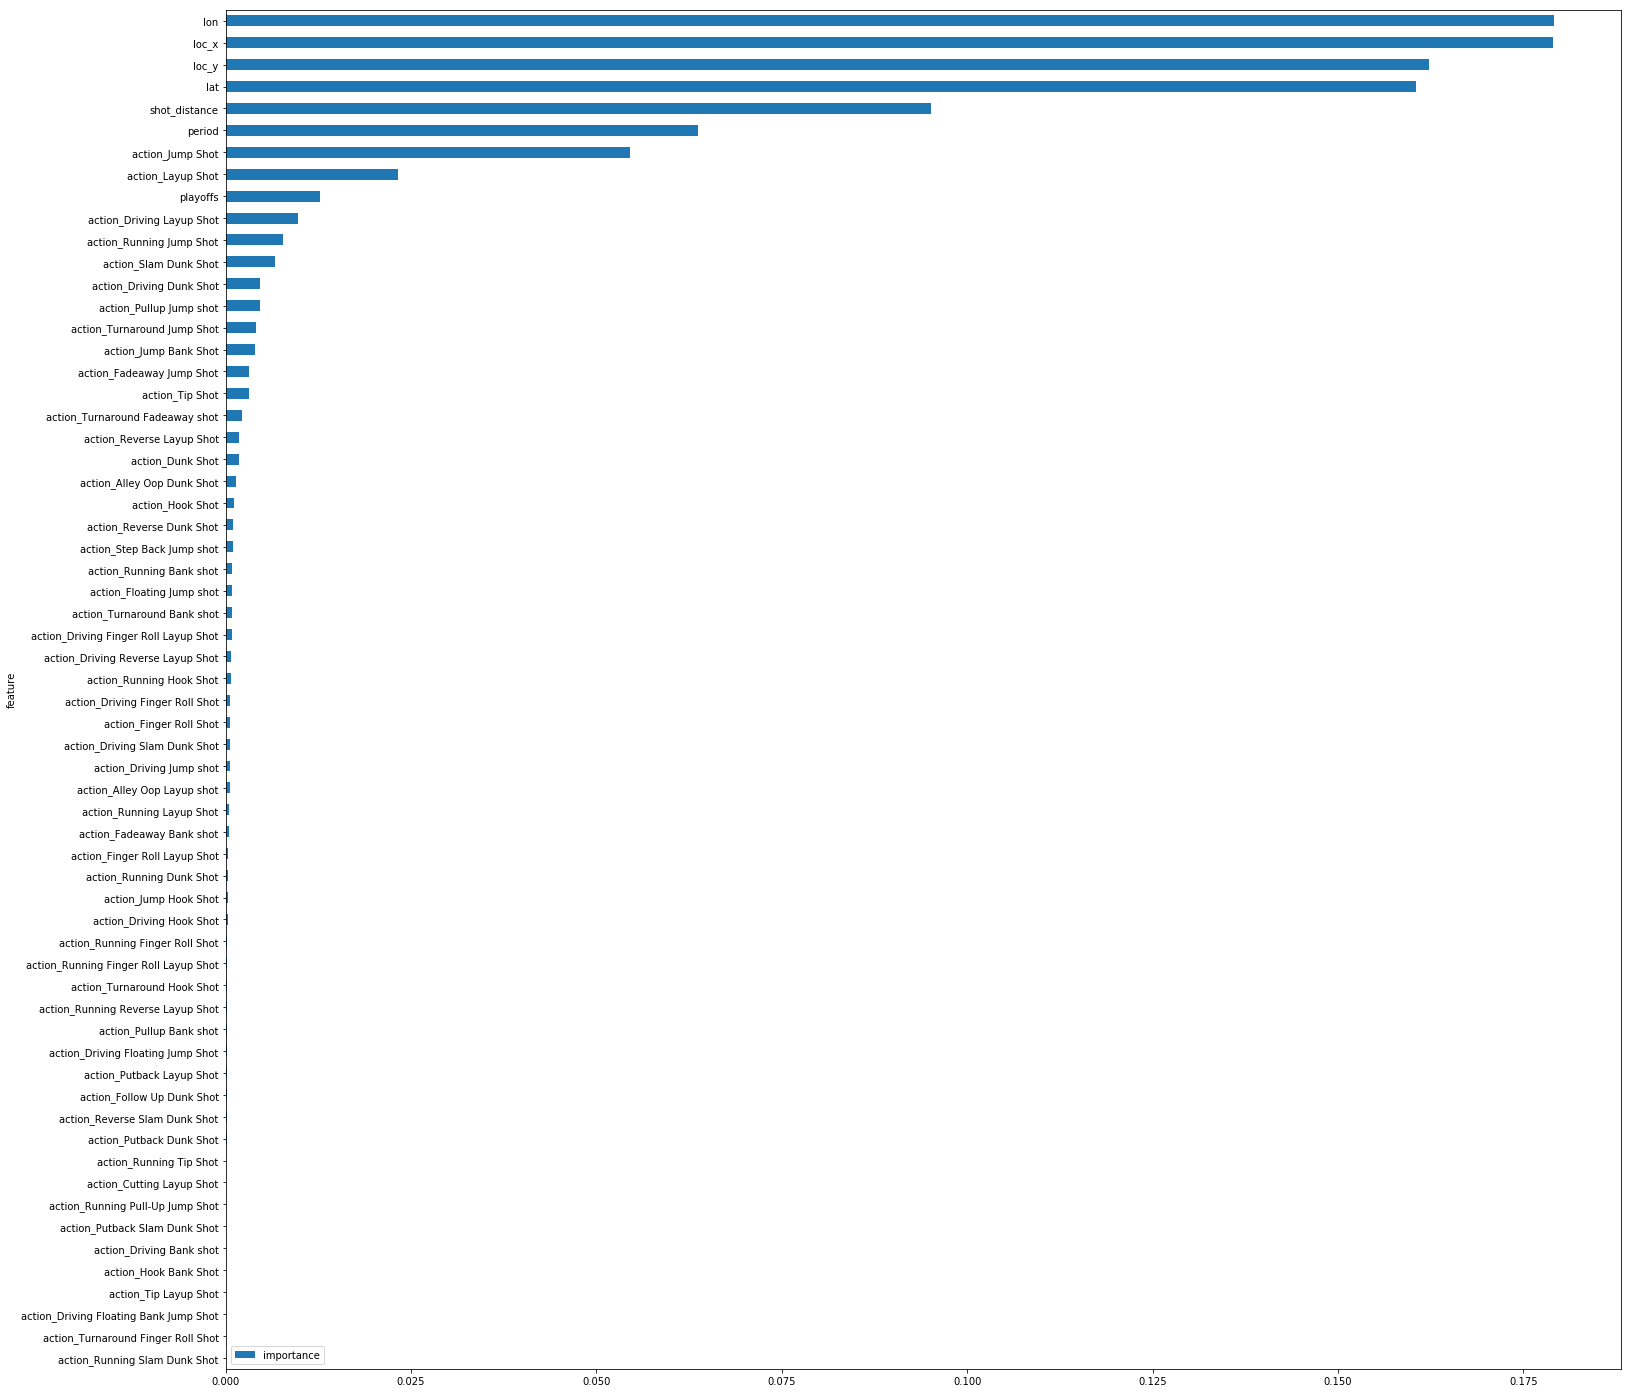

In [157]:
features.plot(kind='barh', figsize=(25, 25))
plt.show()

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV

In [108]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [109]:
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(random_state=42)
pipe = make_pipeline()
kbest = SelectKBest()
kfold = StratifiedKFold()
gridsearch = GridSearchCV()
cross_val = cross_val_score()

models = [rf, logreg_cv, pipe, kbest, kfold, gridsearch, cross_val]

ValueError: not enough values to unpack (expected 2, got 0)

In [177]:
# library & dataset
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x=train['loc_x'], y=train["loc_y"], data=train, fit_reg=False, hue=train['shot_made_flag'], legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
sns.plt.show()

KeyError: '[-250 -248 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237 -235 -234 -233\n -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -218 -217\n -216 -215 -214 -213 -212 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201\n -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186\n -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171\n -170 -169 -168 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155\n -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140\n -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125\n -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110\n -109 -108 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95\n  -94  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82  -81  -80\n  -79  -78  -77  -76  -75  -74  -73  -72  -71  -70  -69  -68  -67  -66  -65\n  -64  -63  -62  -61  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  -50\n  -49  -48  -46  -45  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34\n  -33  -32  -31  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19\n  -18  -17  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4\n   -3   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11\n   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26\n   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41\n   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56\n   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71\n   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86\n   87   88   89   90   91   92   93   94   95   96   97   98   99  100  101\n  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116\n  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131\n  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146\n  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161\n  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176\n  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191\n  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206\n  207  208  209  210  211  212  213  214  215  216  217  218  219  220  222\n  223  224  225  226  227  228  229  230  231  232  233  234  235  236  237\n  238  239  240  241  242  243  244  245  246  247  248  249  250  251  252\n  253  254  255  257  258  259  260  261  262  263  264  265  266  267  268\n  269  270  271  272  273  274  275  276  277  278  279  280  281  282  283\n  285  286  287  288  289  290  291  293  294  295  296  299  301  302  304\n  310  312  313  315  316  317  318  319  320  321  322  323  324  327  329\n  330  332  334  339  340  342  343  349  352  356  358  359  364  367  368\n  370  372  373  375  376  383  384  386  388  390  391  392  393  394  396\n  398  400  401  403  405  406  409  411  432  440  441  443  444  454  465\n  466  467  472  477  483  490  497  500  501  503  511  528  533  547  549\n  561  564  566  572  574  579  585  588  589  591  602  608  610  611  620\n  623  626  633  634  644  651  658  664  679  696  697  702  711  728  741\n  773  791] not in index'

In [15]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


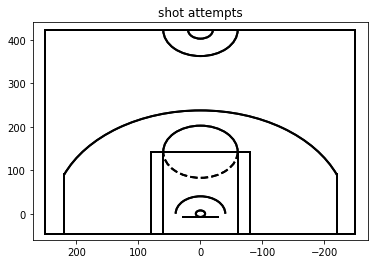

In [19]:
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('shot attempts')
plt.show()

In [180]:
prop.table(table(train['action_type'], train['shot_made_flag']),1) -> temp
as.data.frame.matrix(temp) -> temp
temp$shot <- rownames(temp)
ggplot(temp, aes(x = reorder(shot, `1`), y = 1)) +
geom_point(aes(y = `1`), size = 3, color = " dark blue", stat = "identity") +
    coord_flip() +
    labs(y = "Accuracy", x = "", title = "Accuracy by Shot_type")

SyntaxError: invalid syntax (<ipython-input-180-7edaa4a9da65>, line 1)

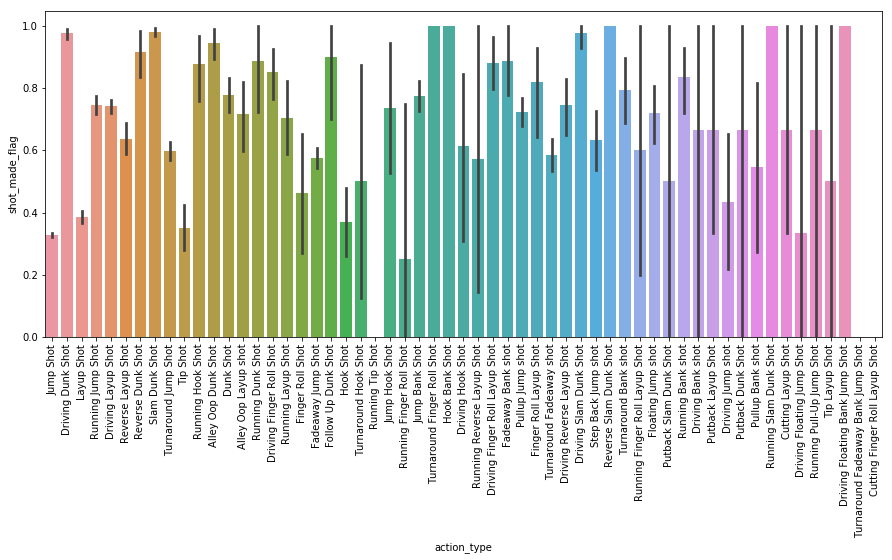

In [181]:
plt.figure(figsize=(15,6))
sns.barplot('action_type', 'shot_made_flag', data=df)
plt.xticks(rotation='vertical')
plt.show()

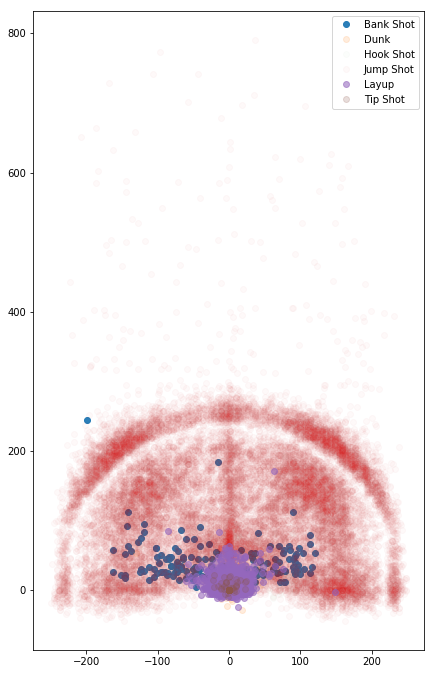

In [184]:

# combined shot types# combi 
groups = df.groupby('combined_shot_type')


fig, ax = plt.subplots(figsize=(court_scale, court_scale*(84.0/50.0)))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
alpha = 0.2
alphas, n = [], float(len(df.combined_shot_type))
for u in [i[0] for i in groups]:
    d = len(df.loc[df.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(np.log1p(d))
for (name, group), alp in zip(groups, alphas):
    ax.plot(group.loc_x, group.loc_y,
            marker='.', linestyle='', ms=12,
            label=name, alpha=alp)
ax.legend()
plt.show()

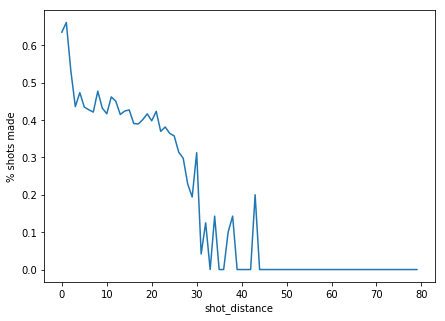

In [187]:
def get_acc(df, against):
    ct = pd.crosstab(df.shot_made_flag, df[against]).apply(lambda x:x/x.sum(), axis=0)
    x, y = ct.columns, ct.values[1, :]
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.xlabel(against)
    plt.ylabel('% shots made')
get_acc(df, 'shot_distance')
plt.show()

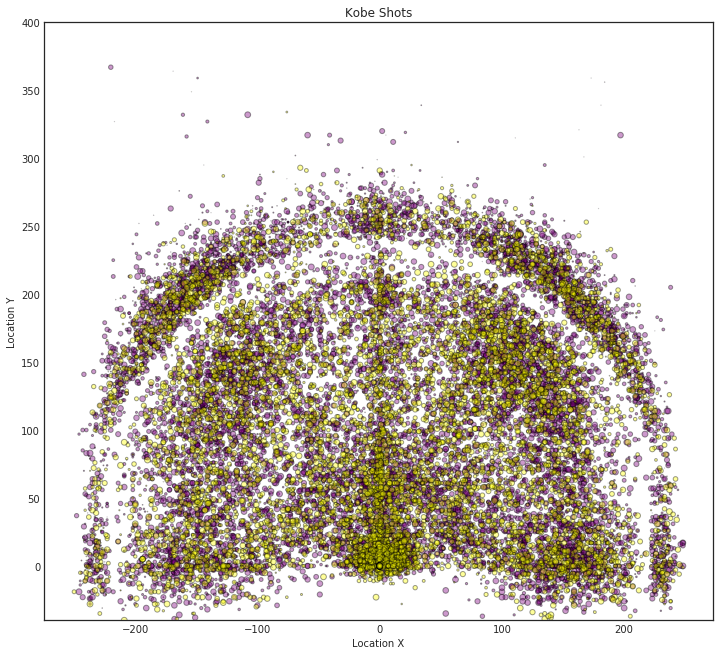

In [190]:
with plt.style.context("seaborn-white"):
    plt.figure(figsize=(12,11))
    kobe_plot = plt.scatter(x=train["loc_x"], y=train["loc_y"],
    s=train['total_seconds_remaining'] / 20, c=colors, marker='o', alpha=.4, edgecolor= 'black', linewidths=1.0)
    plt.title("Kobe Shots")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.ylim(-40, 400)
plt.show()

In [191]:
img = plt.imread("court.jpeg")
fig, ax = plt.subplots()
ax.imshow(img)

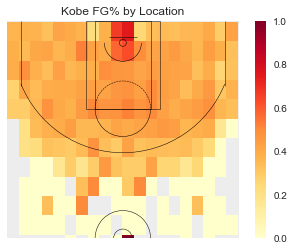

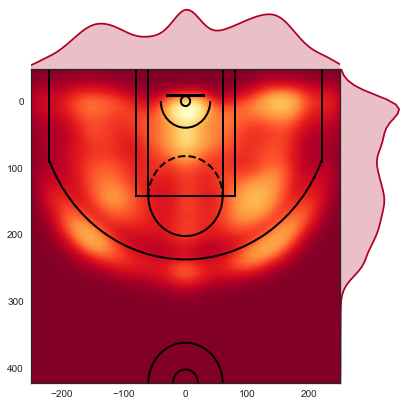

In [372]:
cmap=plt.cm.YlOrRd_r 
with plt.style.context("seaborn-white"):
    plt.figure(figsize=(12,11))
    p = train.loc[train.shot_distance>0]

    joint_shot_chart = sns.jointplot(p["loc_x"], p["loc_y"], stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=100)    
    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    ax.set_xlim(-250,250)
    ax.set_ylim(422.5, -47.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.show()

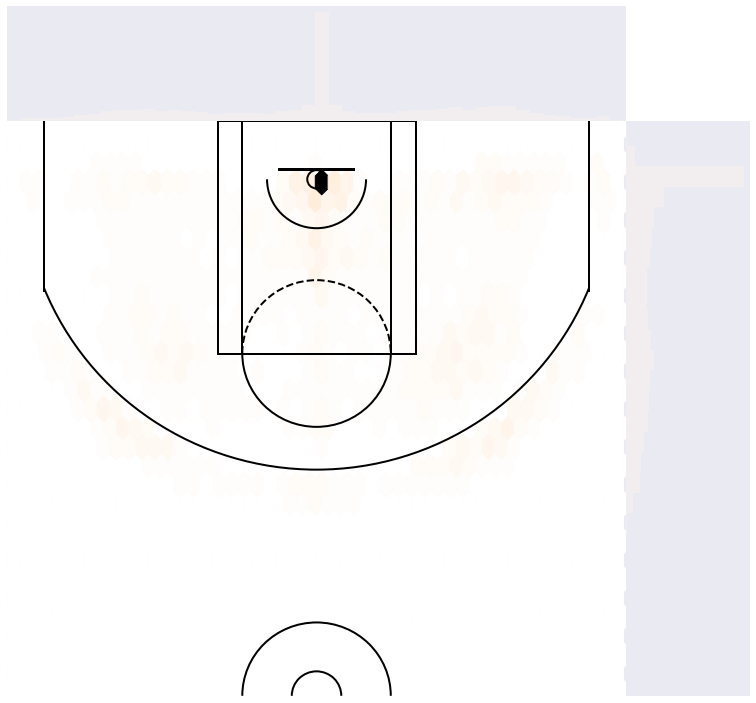

In [377]:
cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(train["loc_x"], train["loc_y"], stat_func=None,
                                 kind='hex', space=0, color=cmap(.02), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

plt.show()

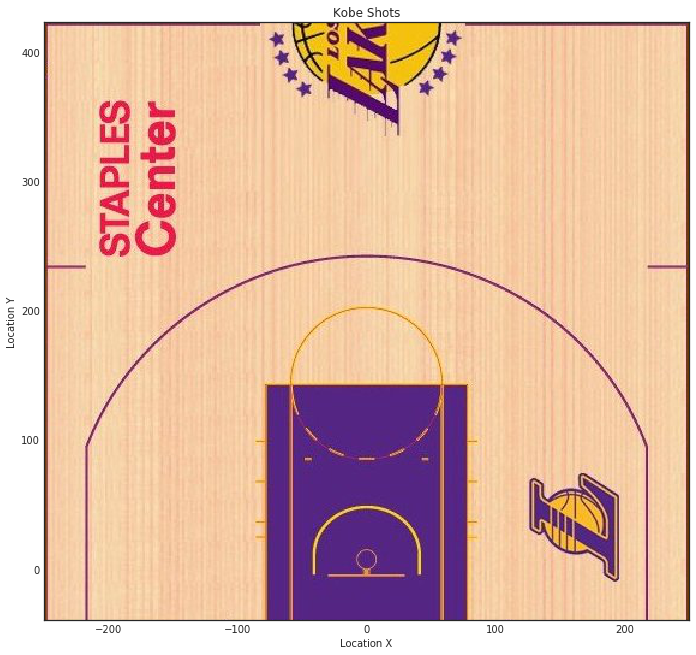

In [229]:
colors = np.where(train["shot_made_flag"]==0,'g','-')
colors[train["shot_made_flag"]==1] = 'k'

with plt.style.context("seaborn-white"):
    img = plt.imread("court.jpeg")
    fig, ax = plt.subplots(figsize=(12, 11))
    ax.imshow(img, extent=[-250, 250, -47.5, 422.5])
    kobe_plot = plt.scatter(train["loc_x"], train["loc_y"],
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=100)  
    plt.title("Kobe Shots")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.xlim(-250, 250)
    plt.ylim(-40, 423)
plt.show()

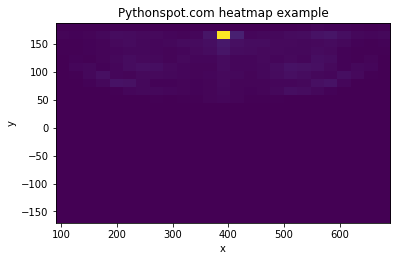

In [240]:
heatmap, xedges, yedges = np.histogram2d(train["loc_y"], train["loc_x"], bins=(25,25))
extent = [xedges[4], xedges[-4], yedges[4], yedges[-4]] 
plt.clf()
plt.title('Pythonspot.com heatmap example')
plt.ylabel('y')
plt.xlabel('x')
plt.imshow(heatmap, extent=extent)
plt.show()

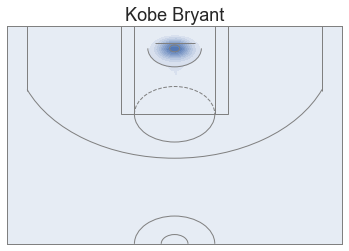

In [249]:
import nbashots as nba 
nba.shot_chart(train["loc_x"], train["loc_y"],
               kind="kde", title="Kobe Bryant")

plt.show()

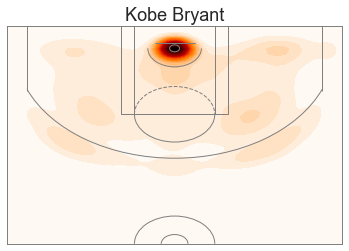

In [253]:
cmap=plt.cm.gist_heat_r
nba.shot_chart(train["loc_x"], train["loc_y"],
               kind="kde", title="Kobe Bryant", cmap=cmap, n_levels=50)

plt.show()

In [379]:
nba.shot_chart(train["loc_x"], train["loc_y"],
               kind="hex", title="Kobe Bryant Shot Distribution",
               cmap=cmap, gridsize=16)

plt.savefig('hexagons.png')

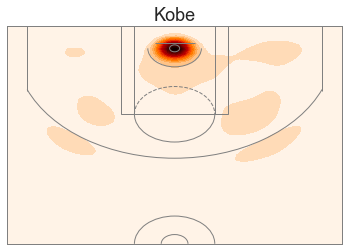

In [258]:
nba.shot_chart(train["loc_x"], train["loc_y"],
               kind="kde", title="Kobe",
            color=cmap(.2), cmap=cmap, n_levels=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'title', 'color'
  s)


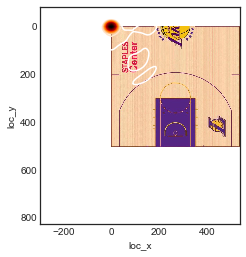

In [265]:
im = plt.imread("court.jpeg")
implot = plt.imshow(im)

sns.kdeplot(train["loc_x"], train["loc_y"], title="Kobe",
            color=cmap(.2), cmap=cmap, n_levels=20)
plt.show()

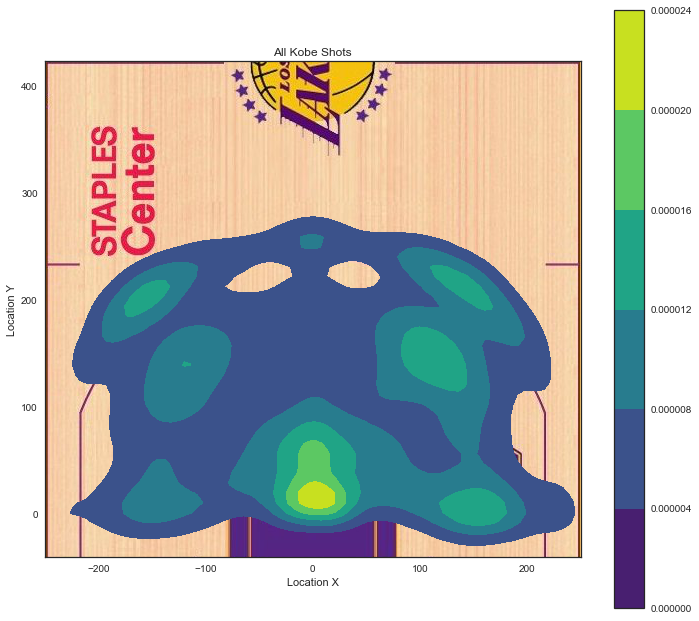

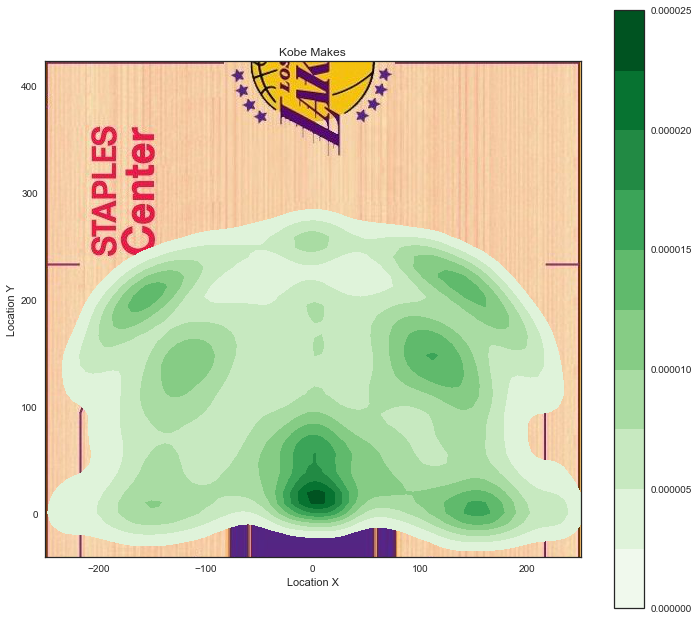

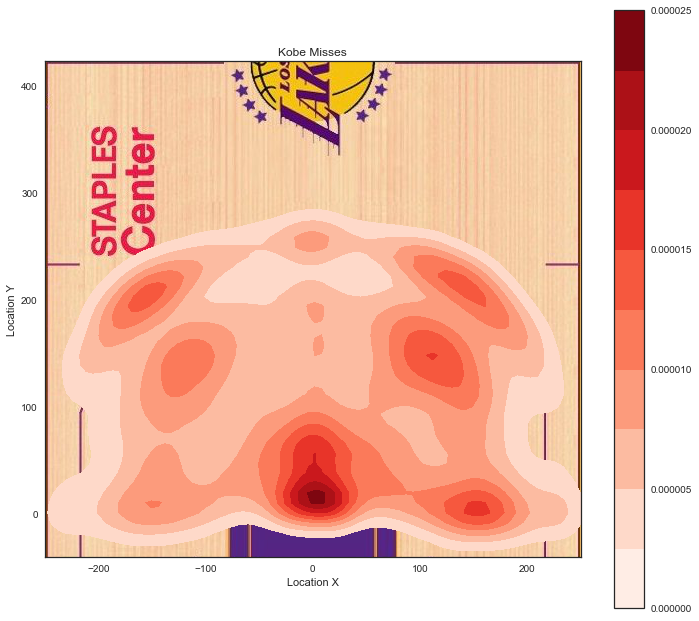

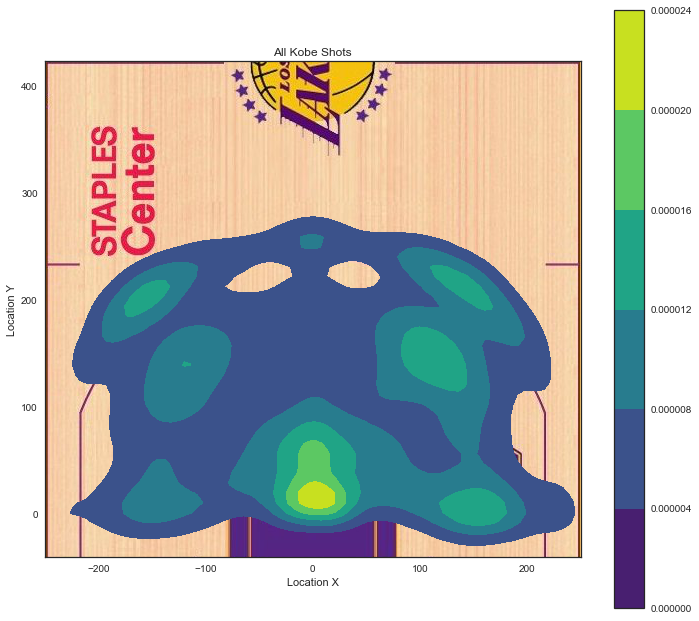

In [359]:
with plt.style.context("seaborn-white"):
    img = plt.imread("court.jpeg")
    fig, ax = plt.subplots(figsize=(12, 11))
    ax.imshow(img, extent=[-250, 250, -47.5, 422.5])
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    p = train.loc[train.shot_distance>0]
    kobe_plot = sns.kdeplot(p["loc_x"], p["loc_y"], n_levels=5, cmap="viridis", shade=True, shade_lowest=False, 
             cbar=True, gridsize=100)
  
    plt.title("All Kobe Shots")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.xlim(-250, 250)
    plt.ylim(-40, 423)
plt.show()


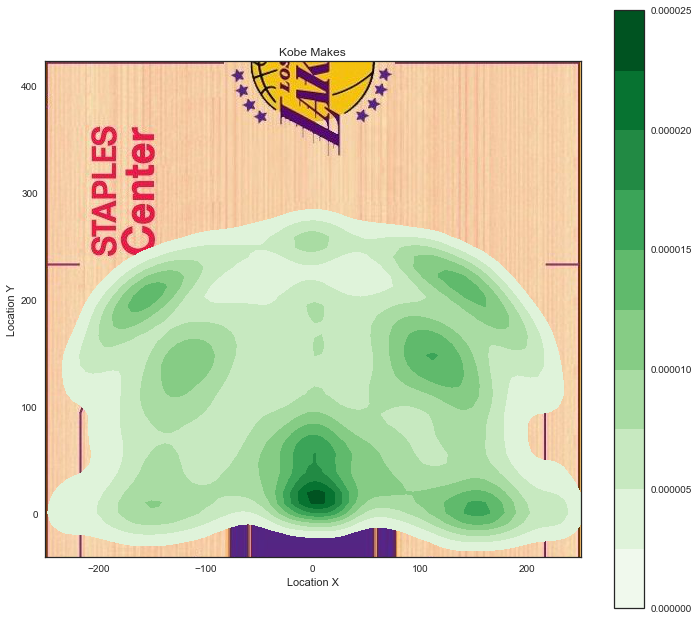

In [365]:
with plt.style.context("seaborn-white"):
    img = plt.imread("court.jpeg")
    fig, ax = plt.subplots(figsize=(12, 11))
    ax.imshow(img, extent=[-250, 250, -47.5, 422.5])
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    j = train.loc[train.shot_made_flag == 1]
    j = train.loc[train.shot_distance>0]
    kobe_plot = sns.kdeplot(j["loc_x"], j["loc_y"], n_levels=10, cmap="Greens", shade=True, shade_lowest=False, 
             cbar=True)
  
    plt.title("Kobe Makes")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.xlim(-250, 250)
    plt.ylim(-40, 423)
plt.show()

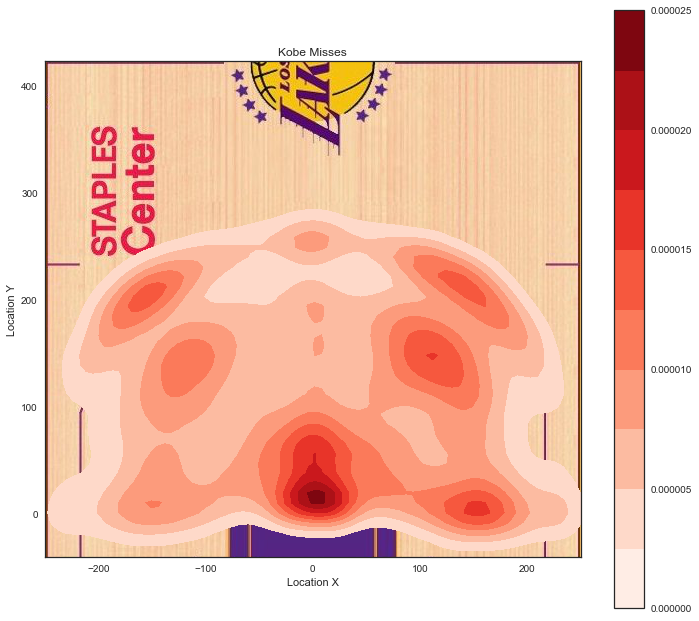

In [366]:
with plt.style.context("seaborn-white"):
    img = plt.imread("court.jpeg")
    fig, ax = plt.subplots(figsize=(12, 11))
    ax.imshow(img, extent=[-250, 250, -47.5, 422.5])
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    h = train.loc[train.shot_made_flag == 0]
    h = train.loc[train.shot_distance>0]
    kobe_plot = sns.kdeplot(h["loc_x"], h["loc_y"], n_levels=10, cmap="Reds", shade=True, shade_lowest=False, 
             cbar=True)
  
    plt.title("Kobe Misses")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.xlim(-250, 250)
    plt.ylim(-40, 423)
plt.show()

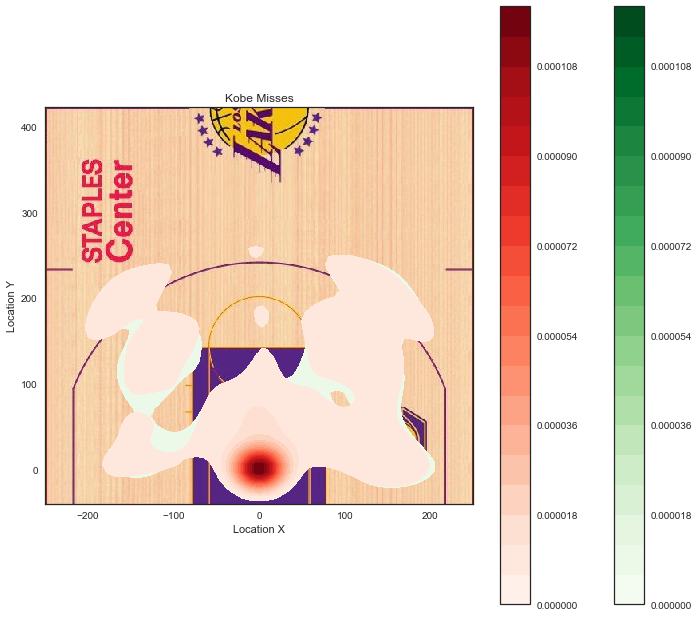

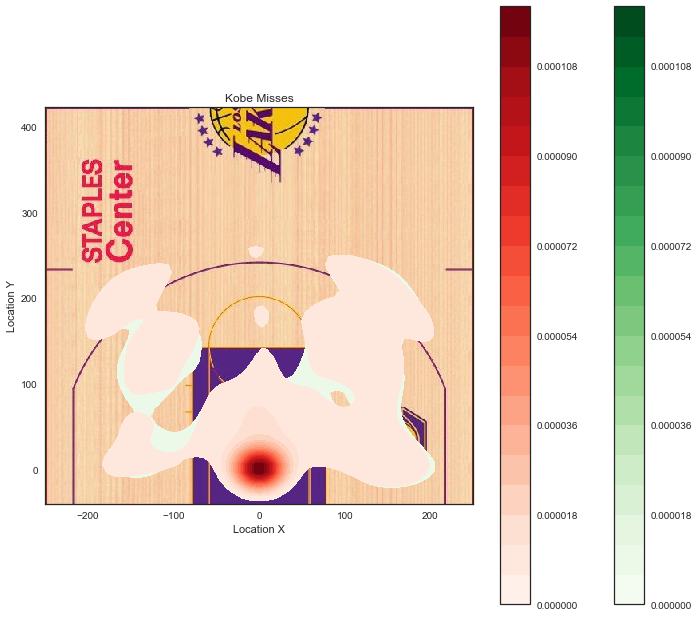

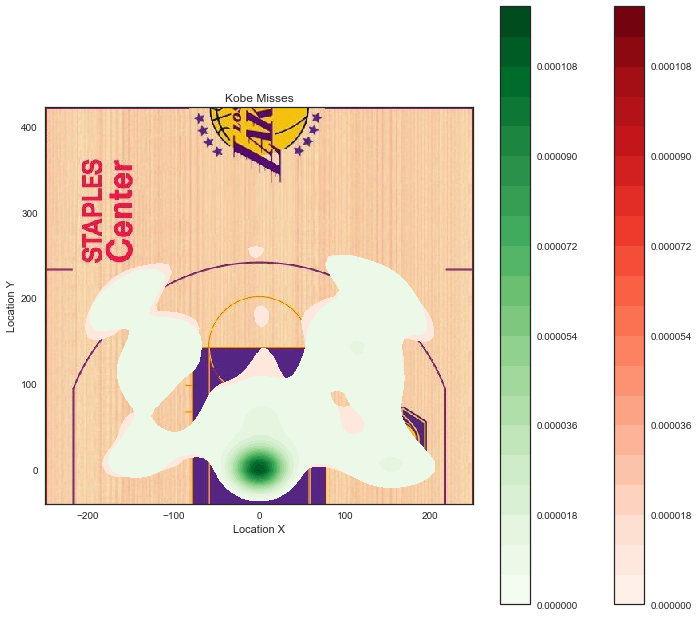

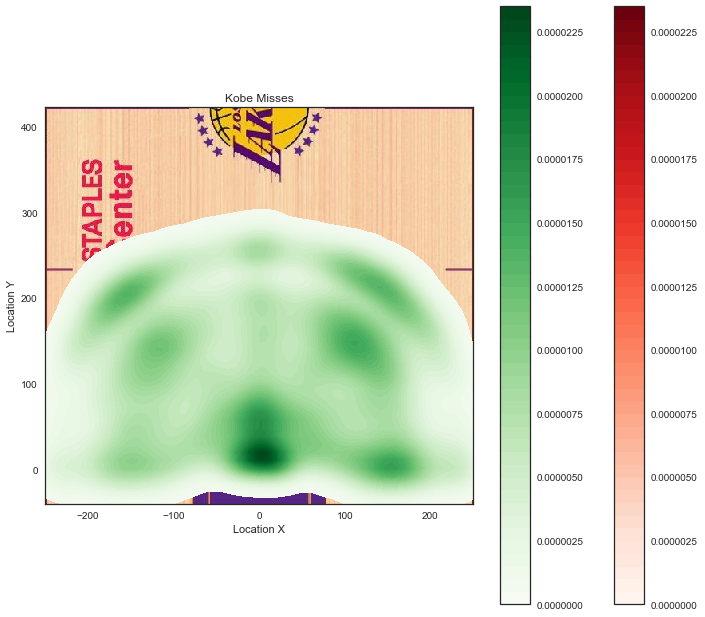

In [370]:
with plt.style.context("seaborn-white"):
    img = plt.imread("court.jpeg")
    fig, ax = plt.subplots(figsize=(12, 11))
    ax.imshow(img, extent=[-250, 250, -47.5, 422.5])
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    h = train.loc[df.shot_made_flag == 0]
    h = train.loc[train.shot_distance>0]
    kobe_plot = sns.kdeplot(h["loc_x"], h["loc_y"], n_levels=50, cmap="Reds", shade=True, shade_lowest=False, 
             cbar=True)
    j = train.loc[df.shot_made_flag == 1]
    j = train.loc[train.shot_distance>0]
    kobe_plot = sns.kdeplot(j["loc_x"], j["loc_y"], n_levels=50, cmap="Greens", shade=True, shade_lowest=False, 
             cbar=True)
    plt.title("Kobe Misses")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.xlim(-250, 250)
    plt.ylim(-40, 423)
plt.show()

In [369]:
with plt.style.context("seaborn-white"):
    img = plt.imread("court.jpeg")
    fig, ax = plt.subplots(figsize=(12, 11))
    ax.imshow(img, extent=[-250, 250, -47.5, 422.5])
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    j = train.loc[df.shot_made_flag == 1]
    h = train.loc[df.shot_made_flag == 0]
    kobe_plot = sns.kdeplot(h["loc_x"], h["loc_y"], n_levels=20, cmap="Reds", shade=True, shade_lowest=False, 
             cbar=True)
    kobe_plot = sns.kdeplot(j["loc_x"], j["loc_y"], n_levels=20, cmap="Greens", shade=True, shade_lowest=False, 
             cbar=True)
    
    plt.title("Kobe Misses")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.xlim(-250, 250)
    plt.ylim(-40, 423)
plt.savefig('overlap2.png')

In [371]:
heatmap = nba.heatmap(train["loc_x"], train["loc_y"],
                          train["shot_made_flag"])

fig = plt.gcf()
fig.colorbar(heatmap)
plt.title("Kobe FG% by Location")
plt.savefig('fgpercentage.png')

In [353]:
with plt.style.context("seaborn-white"):
    img = plt.imread("court.jpeg")
    fig, ax = plt.subplots(figsize=(12, 11))
    ax.imshow(img, extent=[-250, 250, -47.5, 422.5])
    kobe_plot = sns.heatmap(train["loc_x"], train["loc_y"])
    plt.title("Kobe Misses")
    plt.ylabel("Location Y")
    plt.xlabel("Location X")
    plt.xlim(-250, 250)
    plt.ylim(-40, 423)
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)